In [1]:
!pip install biopython
#!pip install rdkit-pypi
!pip install rdkit-pypi==2022.3.5
!pip install PyTDC
!pip install pysmiles
!pip install datamol

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Using cached biopython-1.79-cp37-cp37m-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (2.6 MB)
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 36.8 MB 29 kB/s 
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 105 kB 4.8 MB/s 
  Created wheel for PyTDC: filename=PyTDC-0.3.7-py3-none-any.whl size=130431 sha256=d356ee27a21464741d89739dab0f7098e21cf68bfff993b4407cc8b10aefbf22
  Stored in directory: /root/.cache/pip/wheels/b1/57/8c/6ba602de7712931152522d89857f2a8c83e6925700cfa28144
Successfully built PyTDC
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Using cached pbr-5.11.0-py2.py3-none-any.whl (112 kB)
  Created wheel for pysmiles: filename=pysmiles-1.0.1-py

In [2]:
import os
import pandas as pd
import traceback
import tarfile
import random
import numpy as np
import networkx as nx
import random
from Bio import SeqIO
import itertools
from typing import List, Tuple
import string
import urllib,ast,json
from rdkit import Chem
from rdkit.Chem.Draw import IPythonConsole
from rdkit.Chem import Draw
import matplotlib.pyplot as plt
import pandas as pd
from rdkit.Chem import PandasTools
from tdc.multi_pred import DTI
import datamol as dm
dm.disable_rdkit_log()

In [3]:
data = DTI(name = 'Davis')
split = data.get_split()
df=split['train']


Downloading...
100%|██████████| 21.4M/21.4M [00:01<00:00, 13.9MiB/s]
Loading...
Done!


In [4]:
PandasTools.AddMoleculeColumnToFrame(df, smilesCol='Drug')
df=df.drop(['Target_ID','Target','Y'],axis=1)
df = df.drop_duplicates(subset='Drug_ID', keep='first')
df.shape

(68, 3)

In [5]:
df["#Atoms"] = df['ROMol'].map(lambda x: x.GetNumAtoms())
df["#Bonds"] = df['ROMol'].map(lambda x: x.GetNumBonds())
df["Length_SMILES"] = df['Drug'].map(lambda x: len(x))

,Drug_ID,Drug,ROMol,#Atoms,#Bonds,Length_SMILES
0,11314340,Cc1[nH]nc2ccc(-c3cncc(OCC(N)Cc4ccccc4)c3)cc12,,27,30,45
258,24889392,CC(C)(C)c1cc(NC(=O)Nc2ccc(-c3cn4c(n3)sc3cc(OCC...,,40,45,68
525,11409972,CCN1CCN(Cc2ccc(NC(=O)Nc3ccc(Oc4cc(NC)ncn4)cc3)...,,38,41,61
803,11338033,O=C(NC1CCNCC1)c1[nH]ncc1NC(=O)c1c(Cl)cccc1Cl,,25,27,44
1076,10184653,CN(C)CC=CC(=O)Nc1cc2c(Nc3ccc(F)c(Cl)c3)ncnc2cc...,,34,37,55
...,...,...,...,...,...,...
16707,5494449,Cc1cc(Nc2cc(N3CCN(C)CC3)nc(Sc3ccc(NC(=O)C4CC4)...,,33,37,59
16967,3038525,O=c1ncn2nc(Sc3ccc(F)cc3F)ccc2c1-c1c(Cl)cccc1Cl,,28,31,46
17231,3081361,COc1cc2c(Nc3ccc(Br)cc3F)ncnc2cc1OCC1CCN(C)CC1,,30,33,45
17495,9809715,COC(=O)c1ccc2c(c1)NC(=O)C2=C(Nc1ccc(N(C)C(=O)C...,,40,44,70

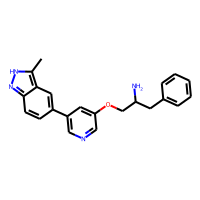
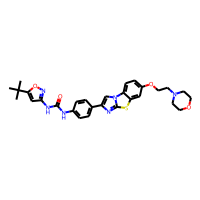
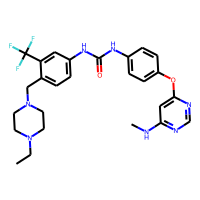
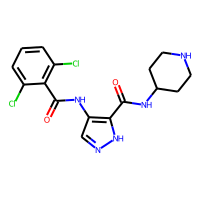
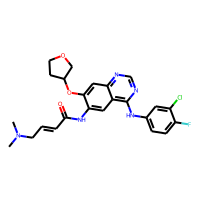
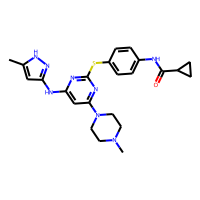
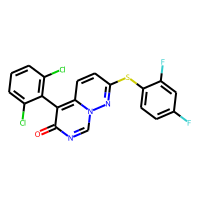
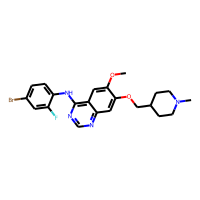
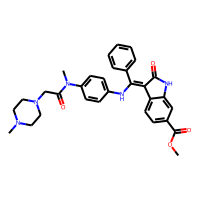
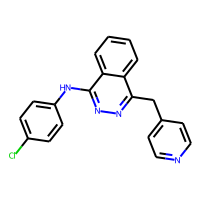

In [6]:
df

### Randomizing Atom Ordering

In [7]:
def randomize_smiles(smiles):
        """Perform a randomization of a SMILES string."""
        m = Chem.MolFromSmiles(smiles)
        ans = list(range(m.GetNumAtoms()))
        np.random.shuffle(ans)
        nm = Chem.RenumberAtoms(m,ans)
        return Chem.MolToSmiles(nm, canonical=False, isomericSmiles=False)

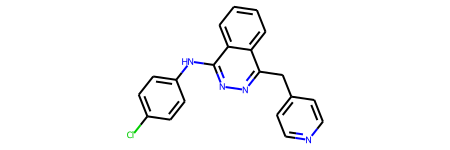

In [8]:
# Original SMILES String
m = Chem.MolFromSmiles("Clc1ccc(Nc2nnc(Cc3ccncc3)c3ccccc23)cc1")
m

[[0, 0], [0, 1], [1, 0], [1, 1], [1, 2], [1, 24], [2, 1], [2, 2], [2, 3], [3, 2], [3, 3], [3, 4], [4, 3], [4, 4], [4, 5], [4, 23], [5, 4], [5, 5], [5, 6], [6, 5], [6, 6], [6, 7], [6, 22], [7, 6], [7, 7], [7, 8], [8, 7], [8, 8], [8, 9], [9, 8], [9, 9], [9, 10], [9, 17], [10, 9], [10, 10], [10, 11], [11, 10], [11, 11], [11, 12], [11, 16], [12, 11], [12, 12], [12, 13], [13, 12], [13, 13], [13, 14], [14, 13], [14, 14], [14, 15], [15, 14], [15, 15], [15, 16], [16, 11], [16, 15], [16, 16], [17, 9], [17, 17], [17, 18], [17, 22], [18, 17], [18, 18], [18, 19], [19, 18], [19, 19], [19, 20], [20, 19], [20, 20], [20, 21], [21, 20], [21, 21], [21, 22], [22, 6], [22, 17], [22, 21], [22, 22], [23, 4], [23, 23], [23, 24], [24, 1], [24, 23], [24, 24]]


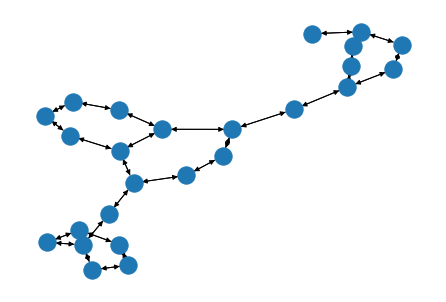

In [9]:
mol = Chem.MolFromSmiles("Clc1ccc(Nc2nnc(Cc3ccncc3)c3ccccc23)cc1")
c_size = mol.GetNumAtoms()
features = []

edges = []
for bond in mol.GetBonds():
  edges.append([bond.GetBeginAtomIdx(), bond.GetEndAtomIdx()])
g = nx.Graph(edges).to_directed()
edge_index = []
mol_adj = np.zeros((c_size, c_size))
for e1, e2 in g.edges:
  mol_adj[e1, e2] = 1
            # edge_index.append([e1, e2])
mol_adj += np.matrix(np.eye(mol_adj.shape[0]))
index_row, index_col = np.where(mol_adj >= 0.5)
for i, j in zip(index_row, index_col):
  edge_index.append([i, j])
nx.draw(g)
print(edge_index)

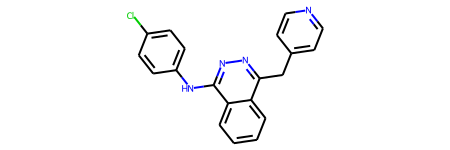

In [10]:
# Randomizing the atom ordering
rand_m=Chem.MolFromSmiles(randomize_smiles("Clc1ccc(Nc2nnc(Cc3ccncc3)c3ccccc23)cc1"))
rand_m

[[0, 0], [0, 1], [0, 24], [1, 0], [1, 1], [1, 2], [1, 21], [2, 1], [2, 2], [2, 3], [2, 11], [3, 2], [3, 3], [3, 4], [4, 3], [4, 4], [4, 5], [4, 10], [5, 4], [5, 5], [5, 6], [6, 5], [6, 6], [6, 7], [7, 6], [7, 7], [7, 8], [7, 9], [8, 7], [8, 8], [9, 7], [9, 9], [9, 10], [10, 4], [10, 9], [10, 10], [11, 2], [11, 11], [11, 12], [12, 11], [12, 12], [12, 13], [13, 12], [13, 13], [13, 14], [13, 21], [14, 13], [14, 14], [14, 15], [15, 14], [15, 15], [15, 16], [15, 20], [16, 15], [16, 16], [16, 17], [17, 16], [17, 17], [17, 18], [18, 17], [18, 18], [18, 19], [19, 18], [19, 19], [19, 20], [20, 15], [20, 19], [20, 20], [21, 1], [21, 13], [21, 21], [21, 22], [22, 21], [22, 22], [22, 23], [23, 22], [23, 23], [23, 24], [24, 0], [24, 23], [24, 24]]


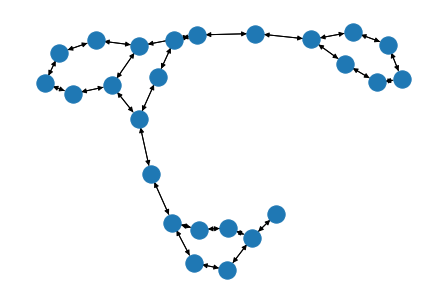

In [11]:
mol = rand_m
c_size = mol.GetNumAtoms()
features = []

edges = []
for bond in mol.GetBonds():
  edges.append([bond.GetBeginAtomIdx(), bond.GetEndAtomIdx()])
g = nx.Graph(edges).to_directed()
edge_index = []
mol_adj = np.zeros((c_size, c_size))
for e1, e2 in g.edges:
  mol_adj[e1, e2] = 1
            # edge_index.append([e1, e2])
mol_adj += np.matrix(np.eye(mol_adj.shape[0]))
index_row, index_col = np.where(mol_adj >= 0.5)
for i, j in zip(index_row, index_col):
  edge_index.append([i, j])
nx.draw(g)
print(edge_index)

### Fragementation and Re-assembling

Fragmenting the molecule from the given SMILES and assembling a list of fragments into a set of possible molecules under rules defined by the brics algorithm.

1. Fragementing all the ligands in the dataset
2. Using the fragments obtained, to generate new molecules.

https://chemistry-europe.onlinelibrary.wiley.com/doi/10.1002/cmdc.200800178


In [12]:
ligands=list(np.unique(split['train']['Drug']))
ligands

['C#Cc1cccc(Nc2ncnc3cc(OCCOC)c(OCCOC)cc23)c1',
 'C=CC(=O)Nc1cc2c(Nc3ccc(F)c(Cl)c3)ncnc2cc1OCCCN1CCOCC1',
 'CC(C)(C)c1cc(NC(=O)Nc2ccc(-c3cn4c(n3)sc3cc(OCCN5CCOCC5)ccc34)cc2)no1',
 'CC(C)(C)c1cnc(CSc2cnc(NC(=O)C3CCNCC3)s2)o1',
 'CC(C)N1NC(=C2C=c3cc(O)ccc3=N2)c2c(N)ncnc21',
 'CC(O)C(=O)O.CN1CCN(c2ccc3c(c2)NC(=C2C(=O)N=c4cccc(F)c4=C2N)N3)CC1.O',
 'CC(Oc1cc(-c2cnn(C3CCNCC3)c2)cnc1N)c1c(Cl)ccc(F)c1Cl',
 'CC1(C)CNc2cc(NC(=O)c3cccnc3NCc3ccncc3)ccc21',
 'CC12OC(CC1(O)CO)n1c3ccccc3c3c4c(c5c6ccccc6n2c5c31)CNC4=O',
 'CC1CCN(C(=O)CC#N)CC1N(C)c1ncnc2[nH]ccc12',
 'CCC1C(=O)N(C)c2cnc(Nc3ccc(C(=O)NC4CCN(C)CC4)cc3OC)nc2N1C1CCCC1',
 'CCCS(=O)(=O)Nc1ccc(F)c(C(=O)c2c[nH]c3ncc(Cl)cc23)c1F',
 'CCN(CC)CCNC(=O)c1c(C)[nH]c(C=C2C(=O)Nc3ccc(F)cc32)c1C',
 'CCN(CCO)CCCOc1ccc2c(Nc3cc(CC(=O)Nc4cccc(F)c4)[nH]n3)ncnc2c1',
 'CCN1CCN(Cc2ccc(NC(=O)Nc3ccc(Oc4cc(NC)ncn4)cc3)cc2C(F)(F)F)CC1',
 'CCOc1cc2ncc(C#N)c(Nc3ccc(OCc4ccccn4)c(Cl)c3)c2cc1NC(=O)C=CCN(C)C',
 'CCn1c(-c2nonc2N)nc2c(C#CC(C)(C)O)ncc(OCC3CCCNC3)c21',
 'CN(C)CC

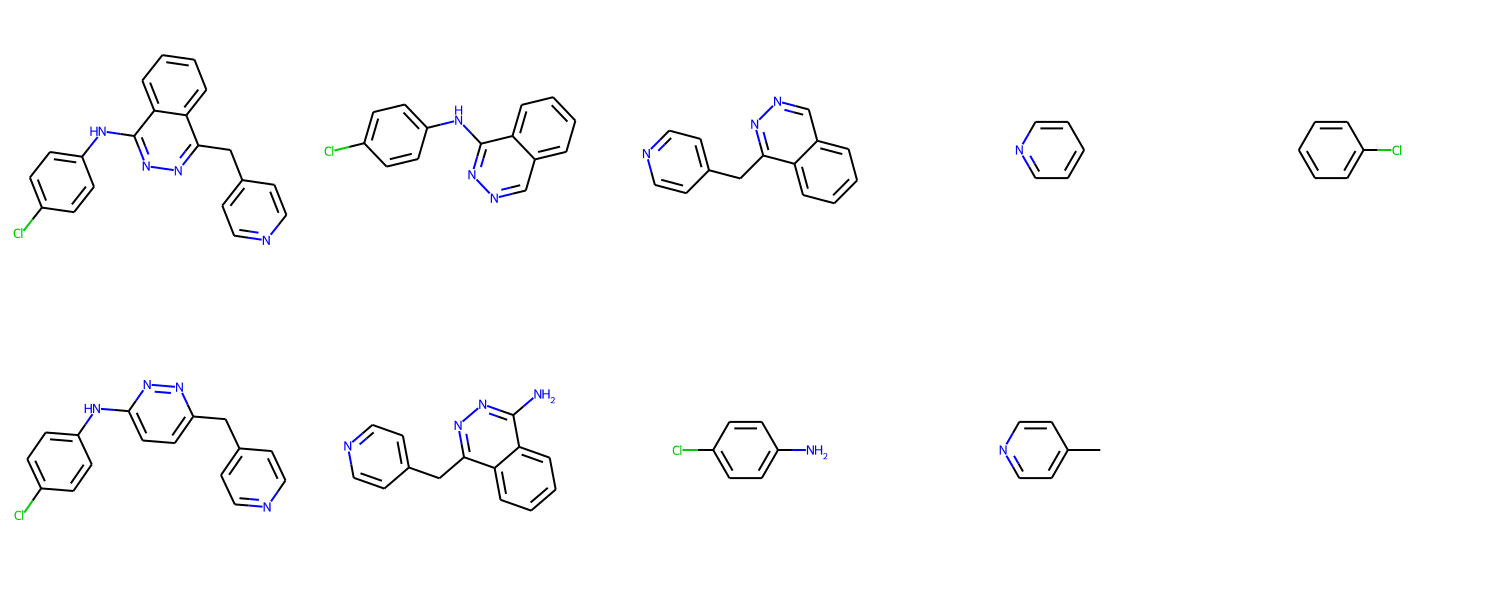

In [13]:
m = Chem.MolFromSmiles("Clc1ccc(Nc2nnc(Cc3ccncc3)c3ccccc23)cc1")
frags = dm.fragment.frag(m)
dm.viz.to_image(frags, n_cols=5)

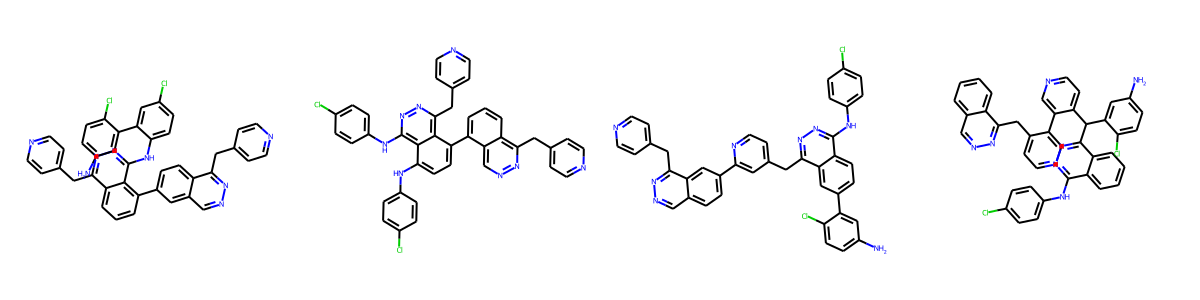

In [ ]:
#Fragments from the given ligand
frags = dm.fragment.brics(m)
frags = frags[:3]
mols = list(dm.fragment.assemble_fragment_order(frags, max_n_mols=4))
dm.viz.to_image(mols)

In [ ]:
for i in mols:
  print(Chem.MolToSmiles(i),len(Chem.MolToSmiles(i)))

Nc1ccc(Cl)c(-c2cc(Cl)ccc2Nc2nnc(Cc3ccncc3)c3cccc(-c4ccc5c(Cc6ccncc6)nncc5c4)c23)c1 82
Clc1ccc(Nc2ccc(-c3cccc4c(Cc5ccncc5)nncc34)c3c(Cc4ccncc4)nnc(Nc4ccc(Cl)cc4)c23)cc1 81
Nc1ccc(Cl)c(-c2ccc3c(Nc4ccc(Cl)cc4)nnc(Cc4ccnc(-c5ccc6cnnc(Cc7ccncc7)c6c5)c4)c3c2)c1 84
Nc1ccc(Cl)c(C(c2ccncc2-c2cnccc2Cc2nncc3ccccc23)c2nnc(Nc3ccc(Cl)cc3)c3ccccc23)c1 79


In [14]:
#Fragments from all the ligands in the dataset
frags_all=[] 
for i in ligands:
  m = Chem.MolFromSmiles(i)
  frags = dm.fragment.frag(m)
  frags_all.extend(frags)

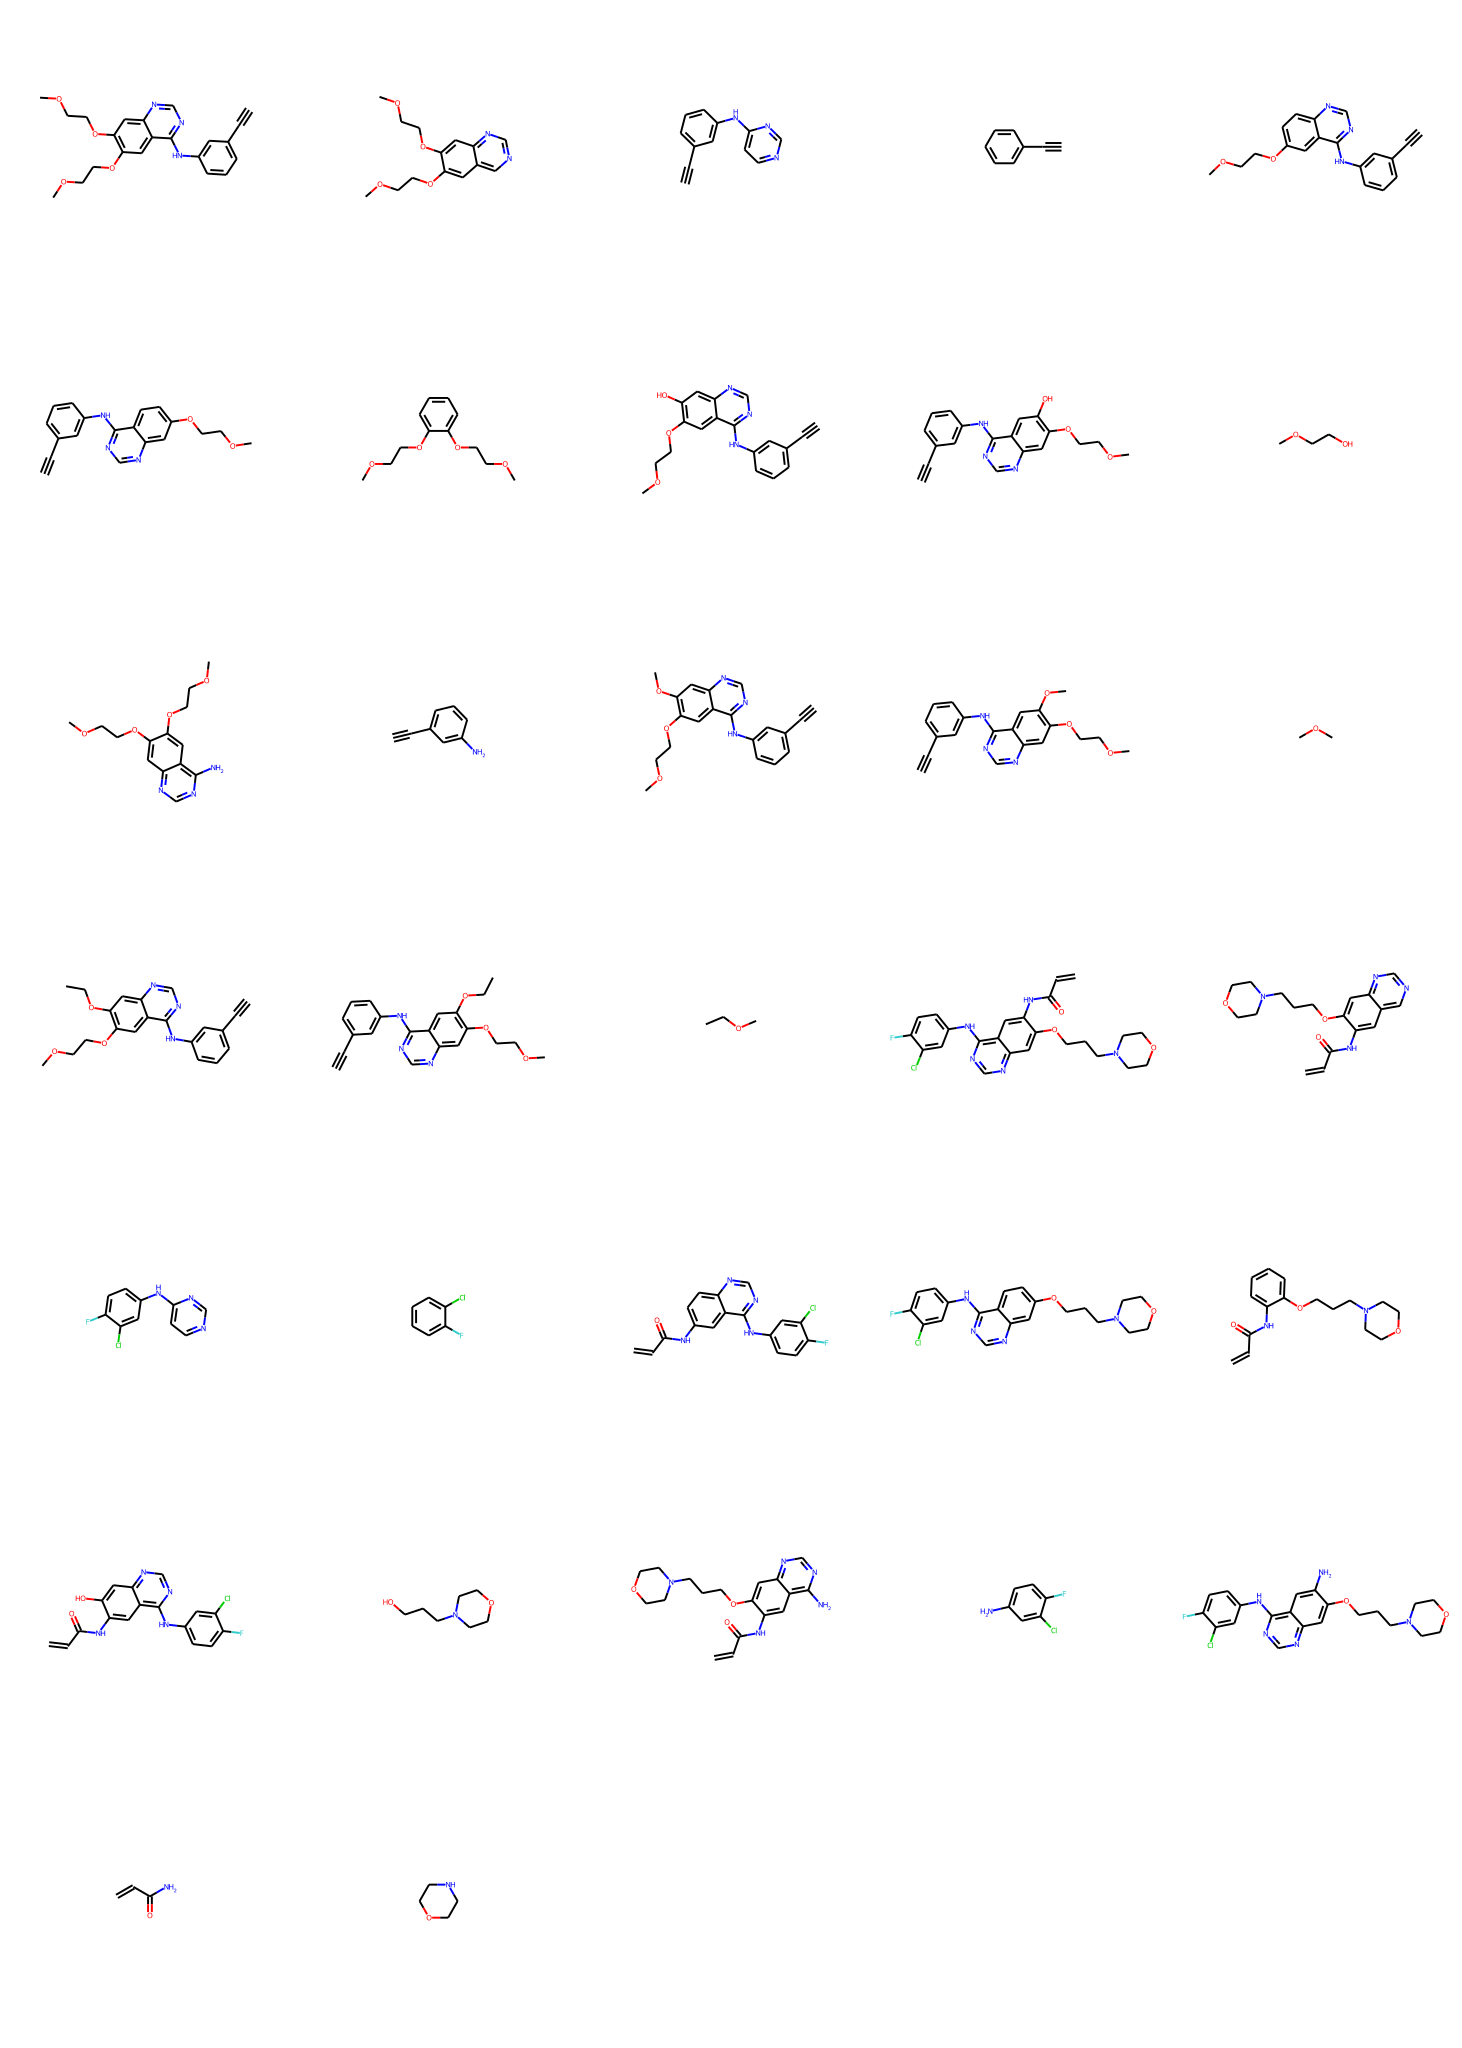

In [15]:
dm.viz.to_image(frags_all, n_cols=5)

In [16]:
## SMILES corresponding to fragements
for i in frags_all:
  print(Chem.MolToSmiles(i))

C#Cc1cccc(Nc2ncnc3cc(OCCOC)c(OCCOC)cc23)c1
COCCOc1cc2cncnc2cc1OCCOC
C#Cc1cccc(Nc2ccncn2)c1
C#Cc1ccccc1
C#Cc1cccc(Nc2ncnc3ccc(OCCOC)cc23)c1
C#Cc1cccc(Nc2ncnc3cc(OCCOC)ccc23)c1
COCCOc1ccccc1OCCOC
C#Cc1cccc(Nc2ncnc3cc(O)c(OCCOC)cc23)c1
C#Cc1cccc(Nc2ncnc3cc(OCCOC)c(O)cc23)c1
COCCO
COCCOc1cc2ncnc(N)c2cc1OCCOC
C#Cc1cccc(N)c1
C#Cc1cccc(Nc2ncnc3cc(OC)c(OCCOC)cc23)c1
C#Cc1cccc(Nc2ncnc3cc(OCCOC)c(OC)cc23)c1
COC
C#Cc1cccc(Nc2ncnc3cc(OCC)c(OCCOC)cc23)c1
C#Cc1cccc(Nc2ncnc3cc(OCCOC)c(OCC)cc23)c1
CCOC
C=CC(=O)Nc1cc2c(Nc3ccc(F)c(Cl)c3)ncnc2cc1OCCCN1CCOCC1
C=CC(=O)Nc1cc2cncnc2cc1OCCCN1CCOCC1
Fc1ccc(Nc2ccncn2)cc1Cl
Fc1ccccc1Cl
C=CC(=O)Nc1ccc2ncnc(Nc3ccc(F)c(Cl)c3)c2c1
Fc1ccc(Nc2ncnc3cc(OCCCN4CCOCC4)ccc23)cc1Cl
C=CC(=O)Nc1ccccc1OCCCN1CCOCC1
C=CC(=O)Nc1cc2c(Nc3ccc(F)c(Cl)c3)ncnc2cc1O
OCCCN1CCOCC1
C=CC(=O)Nc1cc2c(N)ncnc2cc1OCCCN1CCOCC1
Nc1ccc(F)c(Cl)c1
Nc1cc2c(Nc3ccc(F)c(Cl)c3)ncnc2cc1OCCCN1CCOCC1
C=CC(N)=O
C1COCCN1
C=CC(=O)Nc1cc2c(Nc3ccc(F)c(Cl)c3)ncnc2cc1OC
CN1CCOCC1
C=CC(=O)Nc1cc2c(Nc3ccc(F)c(Cl)c3)ncnc

In [30]:
#Filter out all fragments that are more than 15 (in length)
filter_frags_all=[x for x in frags_all if len(Chem.MolToSmiles(x)) <= 15] 


In [17]:
len(frags_all)

988

In [21]:
n = 4
rand_frags=random.sample(frags_all, n)
print(rand_frags)

[<rdkit.Chem.rdchem.Mol object at 0x7f52218e2710>, <rdkit.Chem.rdchem.Mol object at 0x7f52218ce5d0>, <rdkit.Chem.rdchem.Mol object at 0x7f52218dab70>, <rdkit.Chem.rdchem.Mol object at 0x7f52218df9e0>]


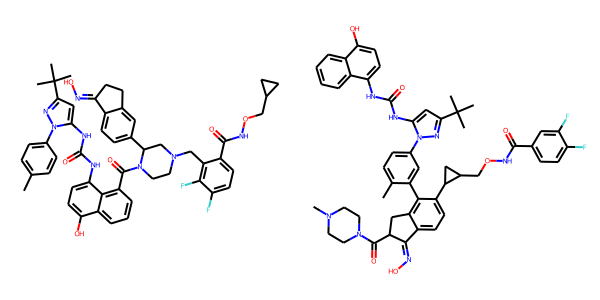

In [22]:
rand_mols= list(dm.fragment.assemble_fragment_order(rand_frags, max_n_mols=2))
dm.viz.to_image(rand_mols)

In [23]:
for i in rand_frags:
  print(Chem.MolToSmiles(i),len(Chem.MolToSmiles(i)))

ON=C1CCc2ccccc21 16
CN1CCN(C=O)CC1 14
Cc1ccc(-n2nc(C(C)(C)C)cc2NC(=O)Nc2ccc(O)c3ccccc23)cc1 53
O=C(NOCC1CC1)c1ccc(F)c(F)c1 27


In [28]:
for i in rand_mols:
  print(Chem.MolToSmiles(i),len(Chem.MolToSmiles(i)))

Cc1ccc(-n2nc(C(C)(C)C)cc2NC(=O)Nc2ccc(O)c3cccc(C(=O)N4CCN(Cc5c(C(=O)NOCC6CC6)ccc(F)c5F)CC4c4ccc5c(c4)CCC5=NO)c23)cc1 116
Cc1ccc(-n2nc(C(C)(C)C)cc2NC(=O)Nc2ccc(O)c3ccccc23)cc1-c1c(C2CC2CONC(=O)c2ccc(F)c(F)c2)ccc2c1CC(C(=O)N1CCN(C)CC1)C2=NO 117


In [31]:
n = 4
rand_frags=random.sample(filter_frags_all, n)
print(rand_frags)

[<rdkit.Chem.rdchem.Mol object at 0x7f52218dd940>, <rdkit.Chem.rdchem.Mol object at 0x7f5225f0f760>, <rdkit.Chem.rdchem.Mol object at 0x7f52218dbee0>, <rdkit.Chem.rdchem.Mol object at 0x7f52218d88a0>]


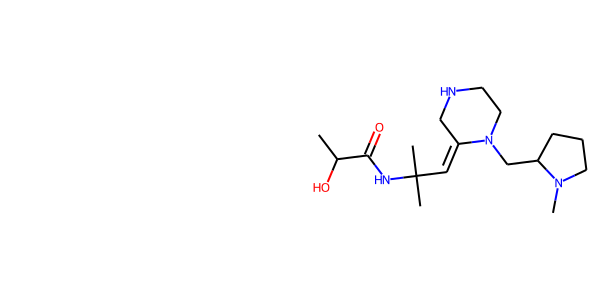

In [32]:
rand_mols= list(dm.fragment.assemble_fragment_order(rand_frags, max_n_mols=2))
dm.viz.to_image(rand_mols)

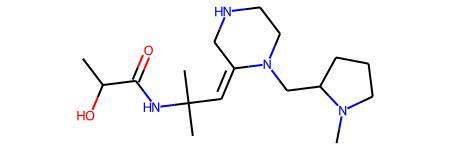

In [36]:
rand_mols[1]

In [37]:
print(Chem.MolToSmiles(rand_mols[1]),len(Chem.MolToSmiles(rand_mols[1])))

CC(O)C(=O)NC(C)(C)C=C1CNCCN1CC1CCCN1C 37
